✅ Available Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
✅ Total samples loaded: 2900


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-12 10:39:31.912725: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,317 (6.21 MB)

 Trainable params: 1,628,317 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.0438 - loss: 3.3956 - val_accuracy: 0.0323 - val_loss: 3.3532
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.0461 - loss: 3.2988 - val_accuracy: 0.0948 - val_loss: 3.2035
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.1623 - loss: 3.0107 - val_accuracy: 0.1961 - val_loss: 2.8929
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.2874 - loss: 2.5389 - val_accuracy: 0.2651 - val_loss: 2.6587
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.3841 - loss: 2.1799 - val_accuracy: 0.3082 - val_loss: 2.4846
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.4808 - loss: 1.8360 - val_accuracy: 0.3448 - val_loss: 2.2386
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.5502 - loss: 1.5556 - val_accuracy: 0.3901 - val_loss: 2.1877
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.6045 - loss: 1.3495 - val_accuracy: 0.

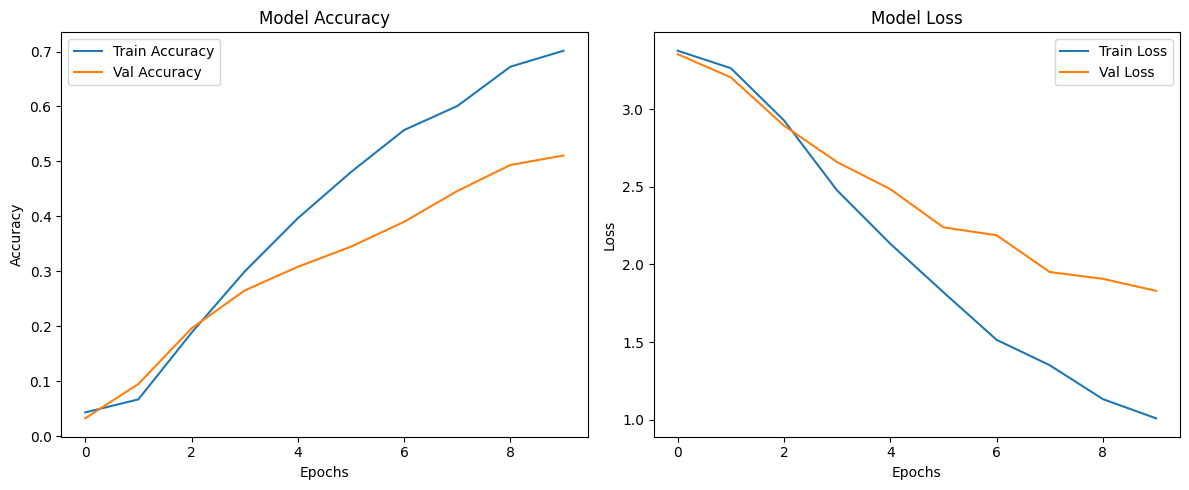

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


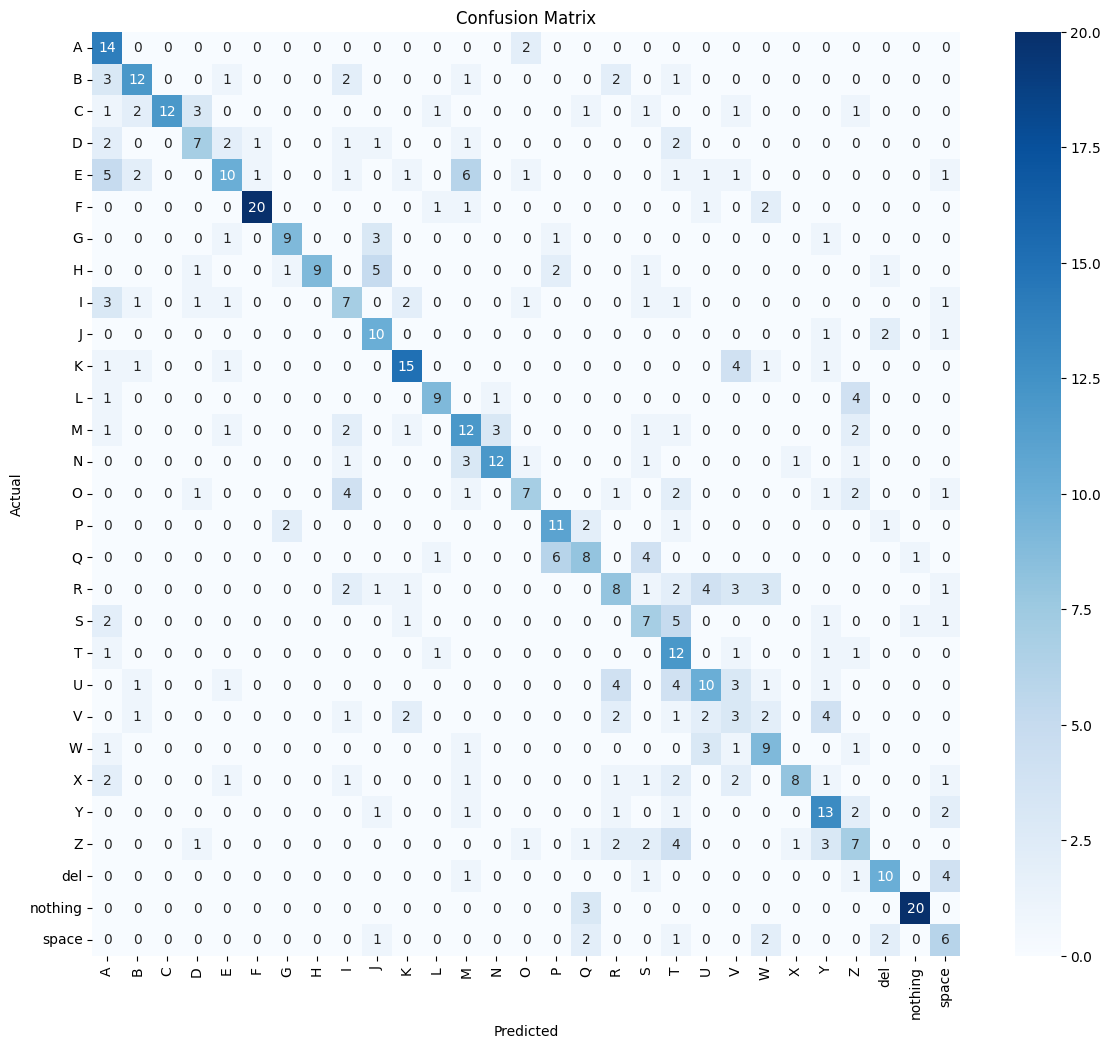

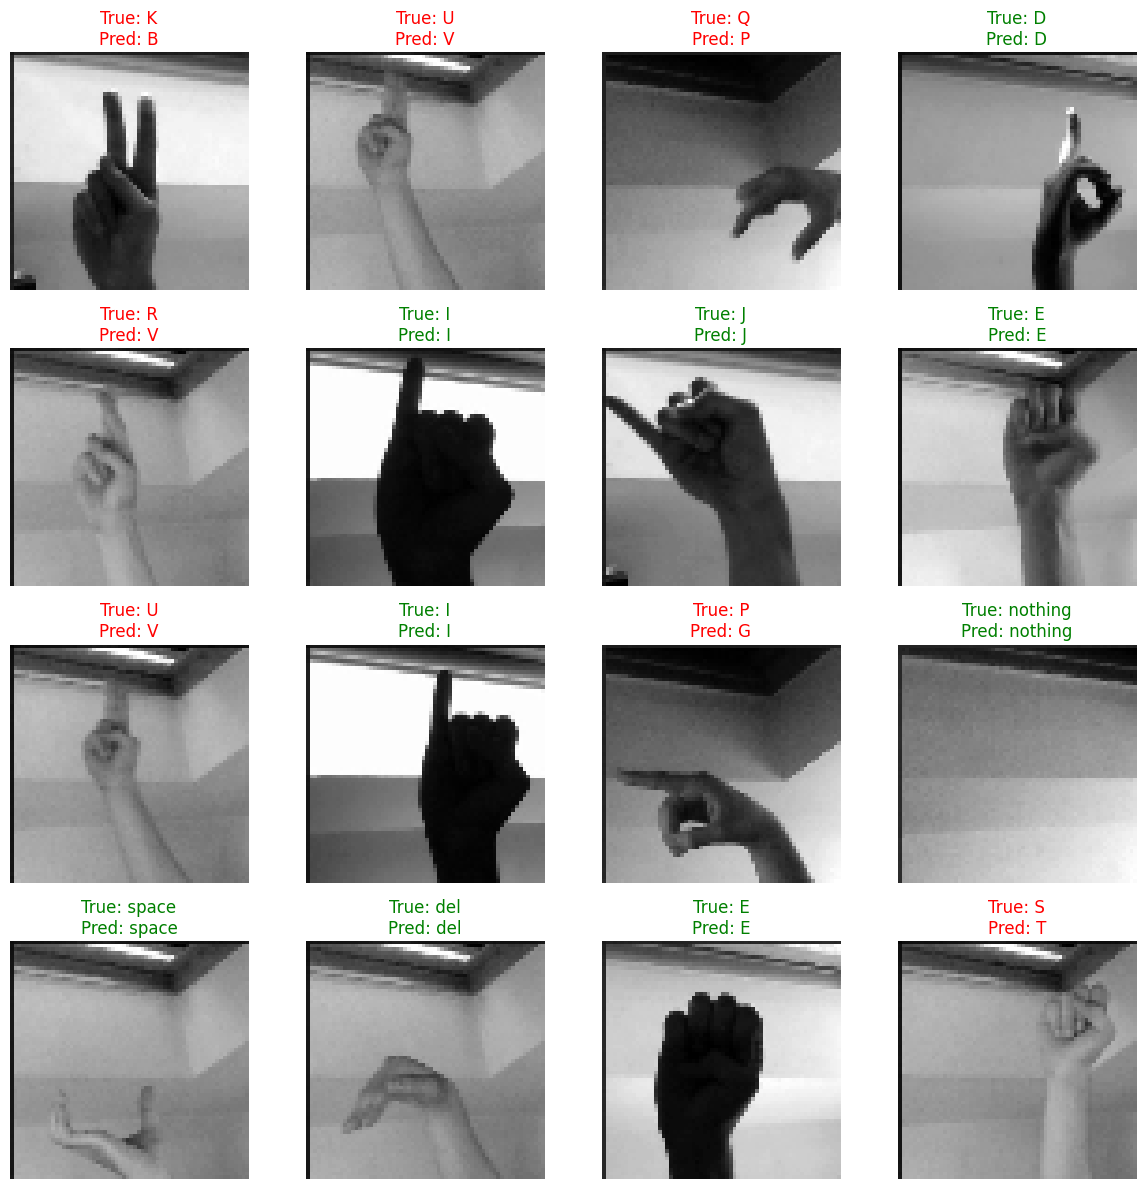

In [2]:
# 📦 Step 1: Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 🗂️ Step 2: Dataset Path (Fixed as per your folder structure)
base_dir = "/kaggle/input/asl-hand-gesture-train-dataset/asl_alphabet_train/asl_alphabet_train"
classes = sorted([folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))])
print("✅ Available Classes:", classes)

# 🧼 Step 3: Load and preprocess images safely
IMG_SIZE = 64
data = []
labels = []

for idx, cls in enumerate(classes):
    folder_path = os.path.join(base_dir, cls)
    count = 0
    for img_name in os.listdir(folder_path):
        if count == 100:
            break
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(idx)
            count += 1

# ✅ Step 4: Prepare data
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
labels = to_categorical(labels, num_classes=len(classes))

print(f"✅ Total samples loaded: {len(data)}")

# 🧪 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 🧠 Step 6: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 🏋️ Step 7: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# ✅ Step 8: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 💾 Step 9: Save Model
model.save("asl_hand_gesture_model.h5")
print("✅ Model saved as asl_hand_gesture_model.h5")

# 📊 Step 10: Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 📉 Step 11: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🖼️ Step 12: Show Predictions
import random

plt.figure(figsize=(12, 12))
for i in range(16):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]
    true_label = classes[np.argmax(y_test[idx])]
    pred_label = classes[np.argmax(y_pred[idx])]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()
